*This analysis highlights key insights regarding customer churn within the telecommunications company.*

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [76]:
df.shape

(7043, 21)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


All 7043 rows contain no null values
=> our dataset is clean

Count of unique values of each column

In [78]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


               Calculated  & Visualize Churn Rate

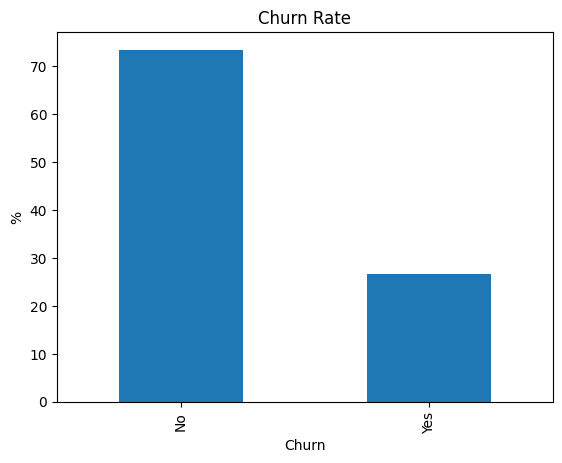

In [92]:
churnRate = df['Churn'].value_counts(normalize=True).mul(100)
churnRate.plot(kind='bar', title='Churn Rate')
plt.ylabel('%')
plt.xlabel('Churn')
plt.show()

               Contract / Churn

In [80]:
churnByContract = df.groupby(['Contract', 'Churn'])['Churn'].count().reset_index(name='Count')
churnByContract

,Contract,Churn,Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


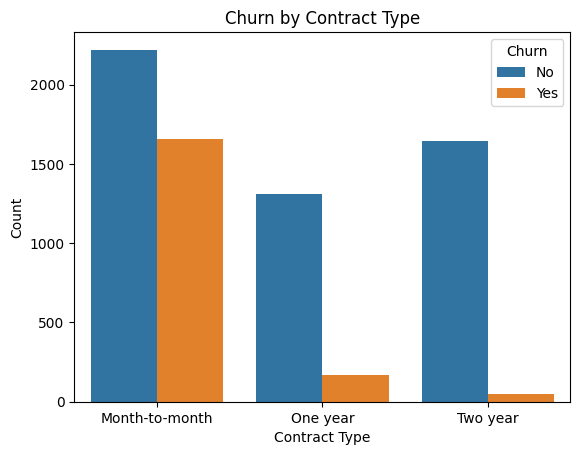

In [81]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

- The majority of the churn is happening among customers having month to month contracts.
=>They are the least loyal
- Customers with one year contracts have a significantly lower churn rate compared to month to month
- Customers with 2 year contracts have the lowerst churn rate
=> customers with longer contracts tend to be more loyal and they're less likely to leave
*Conclusion:Customers on shorter-term contracts (month-to-month) are more likely to churn, while customers on longer-term contracts (one-year and two-year) tend to be more stable.*

                  InternetService / Churn

In [82]:
ChurnByIS = df.groupby(['InternetService', 'Churn'])['Churn'].count().reset_index(name='Count')
ChurnByIS

,InternetService,Churn,Count
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


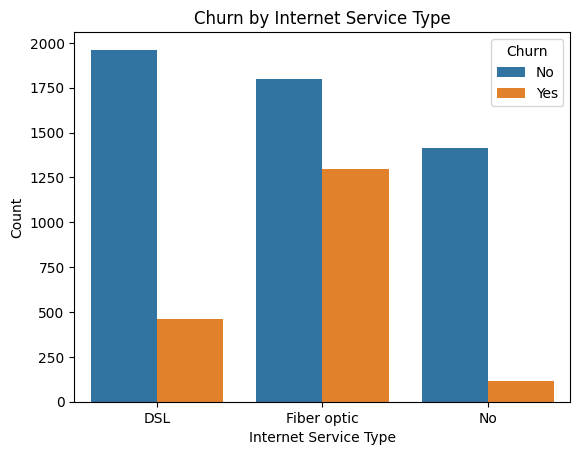

In [83]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

- Customers with DSL service have a relatively low churn rate compared to Customers with Fiber Optic.
- Customers with no internet service are least likely to churn
*Conclusion: There may be issues with fiber optic service that could be contributing to higher customer churn. That could be related to pricing, service quality or other factors that needs further investigation*

                  PhoneService / Churn

In [84]:
ChurnByPS = df.groupby(['PhoneService', 'Churn'])['PhoneService'].count().reset_index(name='Count')
ChurnByPS

,PhoneService,Churn,Count
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


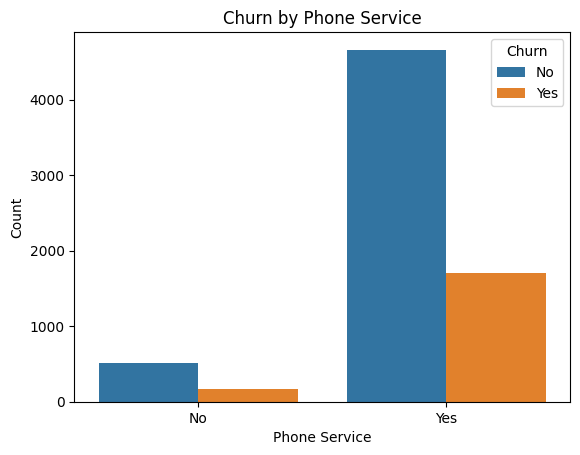

In [85]:
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

- Customers without phone service have a higher churn rate. However, their count is relatively small
- Among customers with phone service, a significant number have churned
*Conclusion: Although phone service is commong among customers, it doesn't necessarily prevent churn*

                  MonthlyCharges / Churn

In [87]:
ChurnMC = df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'max','min'])
ChurnMC

,mean,max,min
Churn,,,
No,61.265124,118.75,18.25
Yes,74.441332,118.35,18.85


*Average monthly charges of customers who churn is ~ 21% higher*

                  TotalCharges / Churn

In [88]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #errors = 'coearce' handles any non-numeric valeus by converting them to NaN
ChurnTC = df.groupby('Churn')['TotalCharges'].agg(['mean', 'max','min']).round(1)
ChurnTC

,mean,max,min
Churn,,,
No,2555.3,8672.4,18.8
Yes,1531.8,8684.8,18.8


*customers who didn't churn have ~ 40% more total charges than the customers who did churn*

                  Partner & Dependents / Churn

In [89]:

partnerDependents = df.groupby(['Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')
#used .pivot_table function to have a clearer view
partnerDependents = partnerDependents.pivot_table(index=['Partner', 'Dependents'], columns='Churn', values='Count')

print(partnerDependents)



Churn                 No   Yes
Partner Dependents            
No      No          2157  1123
        Yes          284    77
Yes     No          1233   420
        Yes         1500   249


- Customers without partners and dependents have a higher churn count compared to those with partners and dependents
*Conclusion: presence of partners and dependents has an impact on customer churn, having dependents seems to have a +ve impact on customer loyalty even if they don't have partners. But even having both partners and dependents are associated with lower churn rates*

                              FINAL CONCLUSION

*In conclusion, month-to-month contracts tend to result in higher churn rates, while longer-term contracts show greater stability. Concerns about fiber optic service's impact on churn warrant further investigation. Despite common phone service usage, it does not consistently prevent churn. The presence of partners and dependents significantly influences churn, with dependents positively impacting customer loyalty. Notably, the combination of partners and dependents is associated with lower churn rates, emphasizing familial arrangements' role in retention.*